In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, callbacks

## Loading MNIST dataset

In [2]:
(train_images, train_labels),(test_images, test_labels) =  tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

## Normalising pixel values

In [4]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [5]:
print(len(train_images))
print(len(test_images))

60000
10000


## reshaping images

In [6]:
train_images = train_images.reshape((-1,28,28,1))
test_images = test_images.reshape((-1,28,28,1))
#(num of images, height, width, channel)

In [7]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_lables = tf.keras.utils.to_categorical(test_labels)

## Data Augmentation

In [8]:
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomFlip(0.2),
    layers.RandomContrast(0.2)
])

## CNN model Architecture

In [9]:
model = models.Sequential([
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),

    layers.Flatten(),

    #Artificial Neural Network
    layers.Dense(128, activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
early_stopping = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

reduce_lr = callbacks.ReduceLROnPlateau(factor=0.2, patience=3)

In [12]:
training = model.fit(train_images, train_labels, epochs=30, validation_split=0.10, callbacks=[early_stopping,reduce_lr])

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - accuracy: 0.8284 - loss: 0.5478 - val_accuracy: 0.9732 - val_loss: 0.1008 - learning_rate: 0.0010
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9637 - loss: 0.1318 - val_accuracy: 0.9817 - val_loss: 0.0646 - learning_rate: 0.0010
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9712 - loss: 0.1057 - val_accuracy: 0.9877 - val_loss: 0.0476 - learning_rate: 0.0010
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9766 - loss: 0.0854 - val_accuracy: 0.9882 - val_loss: 0.0430 - learning_rate: 0.0010
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9796 - loss: 0.0753 - val_accuracy: 0.9912 - val_loss: 0.0383 - learning_rate: 0.0010
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9813 - loss: 0.0682 - val_accuracy: 0.9890 - val_loss: 0.0435 - learning_rate: 0.0010
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy:

In [14]:
training.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

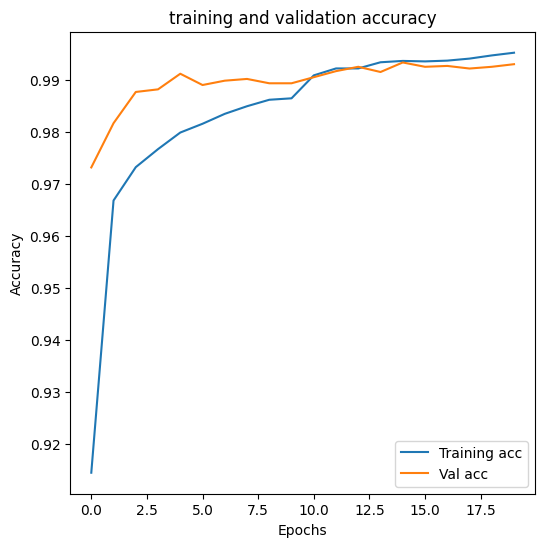

In [19]:
plt.figure(figsize=(6,6))
plt.plot(training.history['accuracy'], label='Training acc')
plt.plot(training.history['val_accuracy'], label='Val acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("training and validation accuracy")
plt.legend()
plt.show()


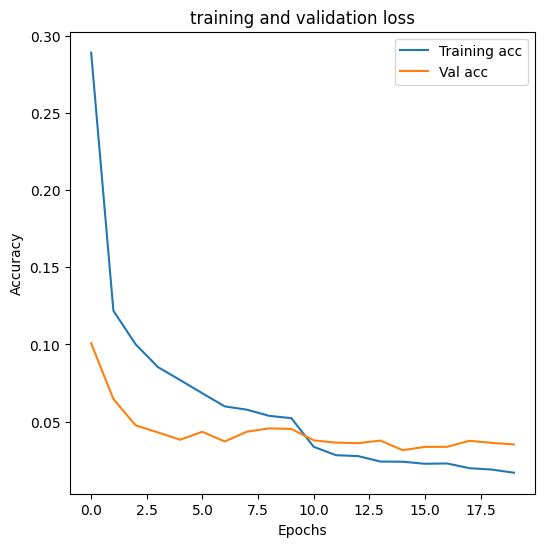

In [21]:
plt.figure(figsize=(6,6))
plt.plot(training.history['loss'], label='Training acc')
plt.plot(training.history['val_loss'], label='Val acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("training and validation loss")
plt.legend()
plt.show()


In [22]:
model.save('mnist_cnn_model.keras')

In [27]:
from PIL import Image, ImageOps

def predict_image(image_path, model):
  img = Image.open(image_path).convert('L')
  img = ImageOps.invert(img) #inverting
  img = img.resize((28,28))
  img_array = np.array(img)
  img_array = img_array.astype("float32") / 255
  img_array = img_array.reshape((1,28,28,1))

  prediction = model.predict(img_array)
  predicted_class = np.argmax(prediction)
  confidence = np.max(prediction)
  return predicted_class, confidence

In [28]:
def load_and_predict(image_path):
  loaded_model = tf.keras.models.load_model('mnist_cnn_model.keras')
  predicted_class, confidence = predict_image(image_path, loaded_model)

  img = Image.open(image_path).convert("L")
  plt.imshow(img,cmap='gray')
  plt.title(f"Predicted : {predicted_class} (Confidence : {confidence})")
  plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


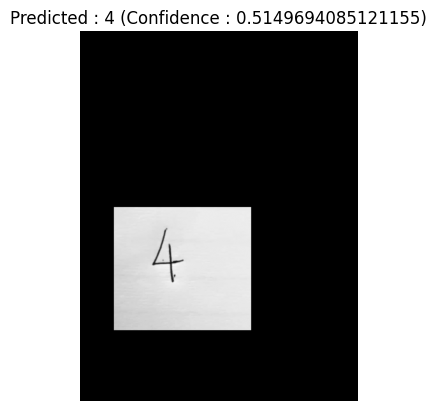

In [30]:
load_and_predict('/content/image.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


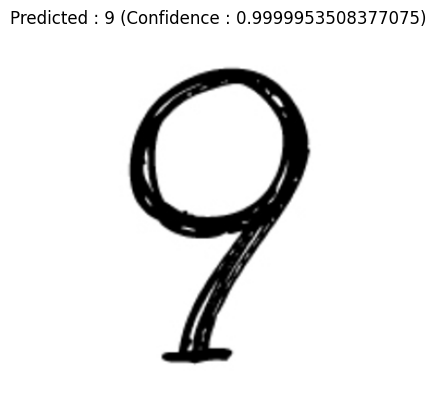

In [32]:
load_and_predict('/content/d238c35f371dd75bec942ae03016c02d_t.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


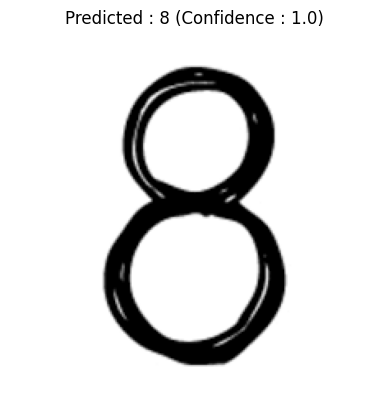

In [33]:
load_and_predict('/content/images (2).png')